In [1]:
# plot_ising.py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_grid(filename):
    """Load the binary grid file"""
    grid = np.fromfile(filename, dtype=np.int8)
    size = int(np.sqrt(len(grid)))
    return grid.reshape((size, size))

def extract_region(grid, center_x, center_y, size):
    """Extract a region of given size centered at (center_x, center_y)"""
    half_size = size // 2
    x_start = center_x - half_size
    x_end = center_x + half_size
    y_start = center_y - half_size
    y_end = center_y + half_size
    return grid[y_start:y_end, x_start:x_end]

def plot_multiscale_ising(filename, T, center_1000=(5000, 5000), center_100=(500, 500)):
    """
    Create three nested plots from saved grid files
    
    Parameters:
    filename : str
        Path to the binary grid file
    T : float
        Temperature used in simulation
    center_1000 : tuple (x, y)
        Center coordinates for 1000x1000 region in the 10000x10000 grid
    center_100 : tuple (x, y)
        Center coordinates for 100x100 region in the 1000x1000 grid
        (relative to the 1000x1000 region's coordinates)
    """
    # Load the full grid
    grid_large = load_grid(filename)
    
    # Extract regions at specified coordinates
    grid_medium = extract_region(grid_large, center_1000[0], center_1000[1], 1000)
    
    # Convert center_100 coordinates to be relative to the full grid
    global_center_100 = (
        center_1000[0] - 500 + center_100[0],
        center_1000[1] - 500 + center_100[1]
    )
    grid_small = extract_region(grid_large, global_center_100[0], global_center_100[1], 100)
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot largest scale
    im1 = ax1.imshow(grid_large, cmap='binary')
    ax1.set_title(f'10000×10000 Grid\nT/T_c = {T/2.27:.3f}')
    
    # Add rectangle to show medium scale region
    rect_medium = plt.Rectangle(
        (center_1000[0] - 500, center_1000[1] - 500), 
        1000, 1000,
        fill=False, color='red', linewidth=1
    )
    ax1.add_patch(rect_medium)
    
    # Plot medium scale
    im2 = ax2.imshow(grid_medium, cmap='binary')
    ax2.set_title('1000×1000 Grid\n(Zoomed Region)')
    
    # Add rectangle to show small scale region
    rect_small = plt.Rectangle(
        (center_100[0] - 50, center_100[1] - 50),
        100, 100,
        fill=False, color='red', linewidth=1
    )
    ax2.add_patch(rect_small)
    
    # Plot smallest scale
    im3 = ax3.imshow(grid_small, cmap='binary')
    ax3.set_title('100×100 Grid\n(Zoomed Region)')
    
    # Adjust layout and add title
    plt.tight_layout()
    fig.suptitle(f'2D Ising Model Scale Invariance at T = {T:.3f}', y=1.05)
    
    return fig



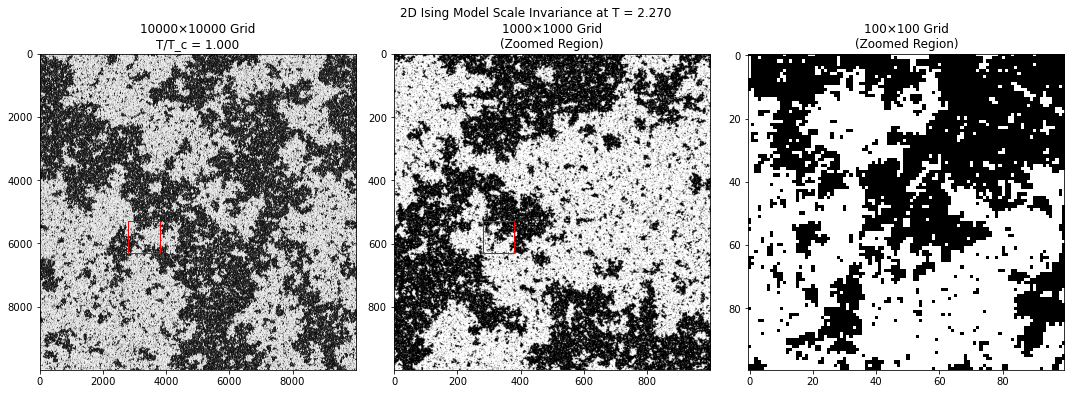

In [ ]:
fig = plot_multiscale_ising(
    "ising_10000.bin",  
    T=2.27,
    center_1000=(3300, 5800),  # Center of medium region
    center_100=(330, 580)     # Center of small region within medium region
)
plt.savefig('ising_multiscale_new.pdf')

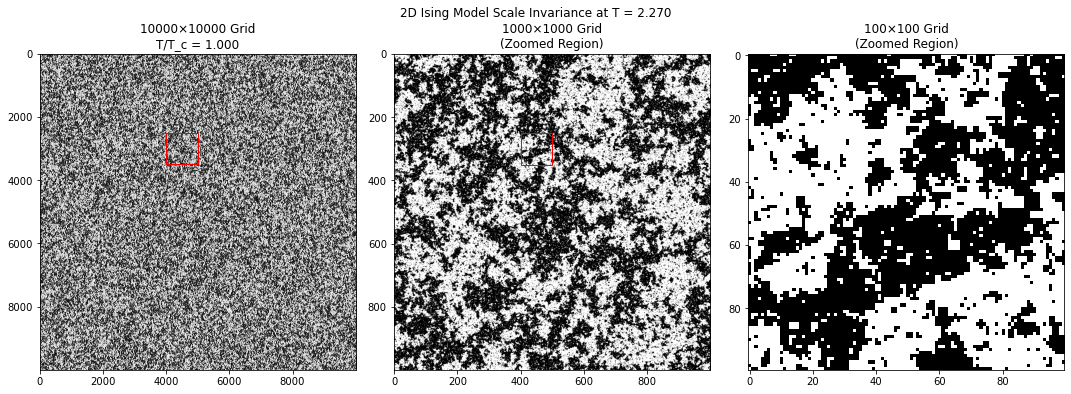

In [ ]:
fig = plot_multiscale_ising(
    "ising_10000_super.bin",  
    T=2.27,
    center_1000=(4500, 3000),  # Center of medium region
    center_100=(450, 300)     # Center of small region within medium region
)
plt.savefig('ising_multiscale_super.pdf')